# M&S.5 - DBSCAN Clustering for Identifying Outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Loading the Iris Dataset

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

## Building and Running DBSCAN Model
**DBSCAN**(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=None)

In [4]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 0.8, min_samples = 19).fit(iris.data)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


In [5]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Visualize Results

In [6]:
from collections import Counter # From Python 

# How many datapoints are assigned to each labels
# Noisy samples are given the label -1.
print ( Counter(model.labels_) ) 

Counter({1: 94, 0: 50, -1: 6})


In [7]:
# Filter the outlier

outliers = pd.DataFrame(iris.data[model.labels_==-1])
outliers.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
outliers

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,2.5,3.0,1.1
1,7.6,3.0,6.6,2.1
2,7.7,3.8,6.7,2.2
3,7.7,2.6,6.9,2.3
4,7.7,2.8,6.7,2.0
5,7.9,3.8,6.4,2.0


Text(0.5, 1.0, 'DBSCAN for Outliers Detection')

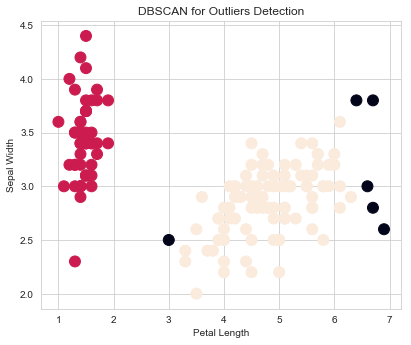

In [8]:
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(iris.data[:,2], iris.data[:,1], c=colors, s=120)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')

plt.title('DBSCAN for Outliers Detection')


Text(0.5, 1.0, 'Outliers')

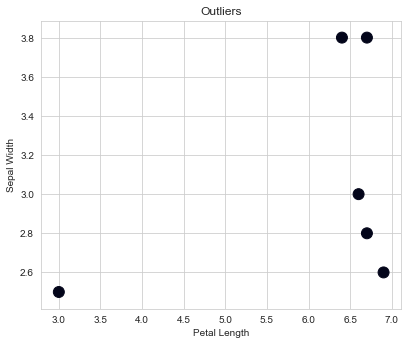

In [9]:
# Print out only the outhlier

out_fig = plt.figure()

out_ax = out_fig.add_axes([.1,.1,1,1])

X = outliers.iloc[:,2].values
Y = outliers.iloc[:,1].values

out_ax.scatter(X, Y, c=[-1,-1,-1,-1,-1,-1], s=120)

out_ax.set_xlabel('Petal Length')
out_ax.set_ylabel('Sepal Width')

plt.title('Outliers')

## Select Esp and Min Sample

In [10]:
from itertools import product

eps_values = np.arange(0.01,1,0.05) # eps values to be investigated
min_samples = np.arange(5,25) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [11]:
from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(iris.data)
    
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    
    if len(np.unique(DBS_clustering.labels_))==1:
        sil_score.append(np.nan)
    else:
        sil_score.append(silhouette_score(iris.data, DBS_clustering.labels_))

In [12]:
from pandas import DataFrame

nc = np.asarray(no_of_clusters)
nc = np.reshape(nc, (len(eps_values),len(min_samples)))
ncd = DataFrame(nc, index=eps_values, columns=min_samples)

sil = np.asarray(sil_score)
sil = np.reshape(sil, (len(eps_values),len(min_samples)))

sild = DataFrame(sil, index=eps_values, columns=min_samples)


pd.options.display.max_columns = None

In [13]:
ncd

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.06,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.16,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.21,3,3,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.26,3,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1
0.31,5,4,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1
0.36,7,4,4,3,3,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1
0.41,5,5,7,5,4,4,3,2,2,2,2,2,2,2,2,2,2,2,1,1
0.46,3,3,3,3,3,5,3,3,3,3,2,2,2,2,2,2,2,2,2,2


In [14]:
sild

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.16,0.092646,0.079572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.21,0.182564,0.171088,0.171088,0.108573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.26,-0.050988,0.385993,0.325627,0.325627,0.312765,0.175759,0.146760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.31,-0.024518,0.066361,0.054599,0.519679,0.480123,0.480123,0.464873,0.295639,0.295639,0.252646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.36,0.116184,0.154378,0.148138,0.175122,0.084965,0.533914,0.533914,0.533914,0.533914,0.533914,0.420763,0.336570,0.336570,0.336570,NaN,NaN,NaN,NaN,NaN,NaN
0.41,0.277940,0.277940,0.199245,0.170112,0.164402,0.121403,0.195985,0.599866,0.599866,0.586819,0.572436,0.545764,0.489079,0.489079,0.489079,0.417345,0.301059,0.301059,NaN,NaN
0.46,0.461393,0.452556,0.442214,0.419961,0.404580,0.167172,0.348368,0.287229,0.281191,0.233689,0.616398,0.616398,0.616398,0.599866,0.587445,0.542497,0.528152,0.489079,0.489079,0.489079


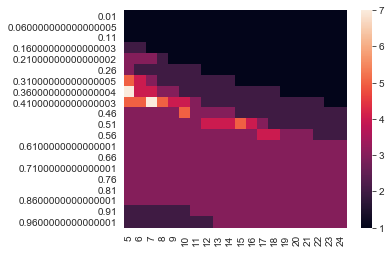

In [15]:
sb.heatmap(ncd)

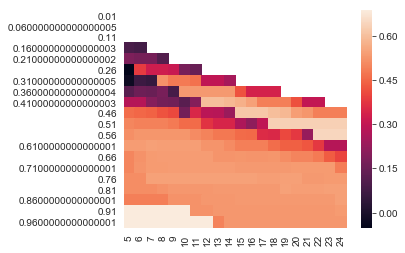

In [16]:
sb.heatmap(sild)

In [32]:
sild[sild==sild.max().max()]

,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
